<a href="https://colab.research.google.com/github/onlyrituraj/onlyrituraj/blob/main/SentimentalNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sentiment_Stock_Data.xlsx to Sentiment_Stock_Data.xlsx


In [ ]:
#Goal: Extract accurate company-related information from tweets.
import pandas as pd
df = pd.read_excel('Sentiment_Stock_Data.xlsx')  # Change to file_path if using Drive
df = df.rename(columns={'actual_column_name': 'tweet_text'}) #Rename column to tweet_text
print(df.head())  # Check first few rows

   Sentiment                                           Sentence
0          0  According to Gran , the company has no plans t...
1          1  For the last quarter of 2010 , Componenta 's n...
2          1  In the third quarter of 2010 , net sales incre...
3          1  Operating profit rose to EUR 13.1 mn from EUR ...
4          1  Operating profit totalled EUR 21.1 mn , up fro...


In [ ]:
#Goal: Use state-of-the-art NLP techniques for entity identification and sentiment analysis.
!pip install pandas numpy matplotlib seaborn scikit-learn nltk spacy wordcloud transformers torch openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import torch
from transformers import BertTokenizer, BertForSequenceClassification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 95.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
#Goal: Identify companies, financial terms, and products mentioned in tweets.
def extract_entities(text):
    # Check if text is a string before processing
    if isinstance(text, str):
        doc = nlp(text)
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        return entities
    else:
        return []  # Return empty list for non-string values

df['entities'] = df['Sentence'].apply(extract_entities)
print(df[['Sentence', 'entities']].head())  # Show identified entities

                                            Sentence  \
0  According to Gran , the company has no plans t...   
1  For the last quarter of 2010 , Componenta 's n...   
2  In the third quarter of 2010 , net sales incre...   
3  Operating profit rose to EUR 13.1 mn from EUR ...   
4  Operating profit totalled EUR 21.1 mn , up fro...   

                                            entities  
0                    [(Gran, PERSON), (Russia, GPE)]  
1  [(the last quarter of 2010, DATE), (Componenta...  
2  [(the third quarter of 2010, DATE), (5.2 %, PE...  
3  [(EUR, ORG), (13.1, CARDINAL), (EUR, ORG), (8....  
4  [(EUR 21.1, PRODUCT), (EUR, ORG), (18.6, CARDI...  


In [ ]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#Goal: Prepare text data for accurate sentiment classification.
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        # Assign the result of the list comprehension to a new variable (e.g., filtered_tokens)
        filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return " ".join(filtered_tokens) # Join the filtered tokens
    # If not a string (e.g., NaN), return an empty string
    else:
        return ""

df['cleaned_text'] = df['Sentence'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


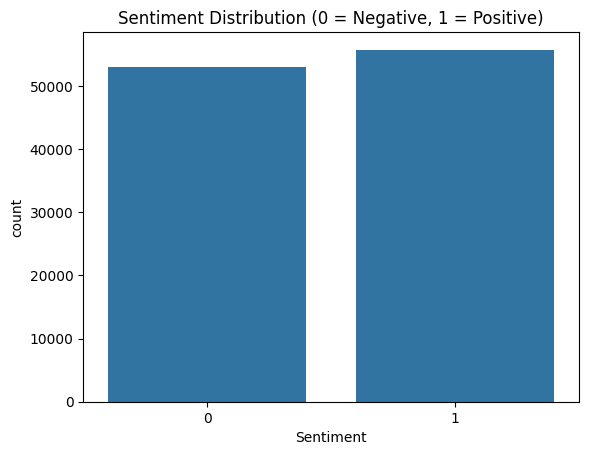

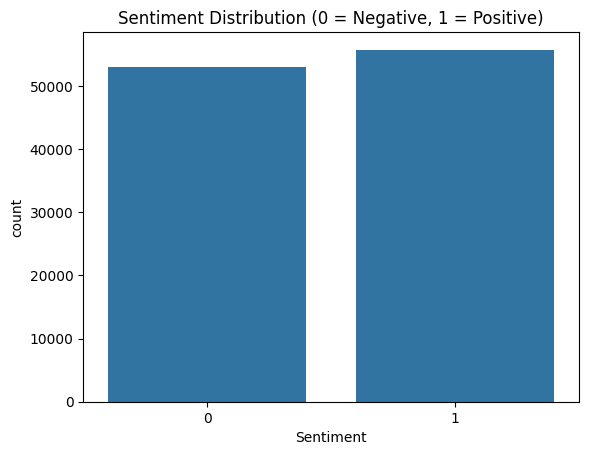

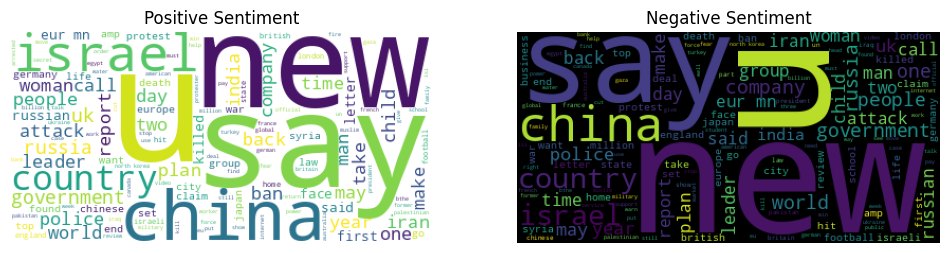

In [ ]:
#Goal: Link sentiment scores with specific company aspects.
# Check if 'Sentiment' column exists (case-sensitive)
if 'Sentiment' in df.columns:
    sns.countplot(x=df['Sentiment'])  # Use 'Sentiment' if it exists
    plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
    plt.show()
else:
    print("Error: 'sentiment' or 'Sentiment' column not found in the DataFrame.")
    # Add code here to perform sentiment analysis and create a 'sentiment' column if needed.
    # For example, using VADER or TextBlob

# ---->  Change the column name here to 'Sentiment' to match the DataFrame
sns.countplot(x=df['Sentiment'])  # Changed from 'sentiment' to 'Sentiment'
plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.show()

# ----> Change the column name here to 'Sentiment' as well
positive_words = " ".join(df[df['Sentiment'] == 1]['cleaned_text']) # Changed from 'sentiment' to 'Sentiment'
negative_words = " ".join(df[df['Sentiment'] == 0]['cleaned_text']) # Changed from 'sentiment' to 'Sentiment'

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=200, background_color='white').generate(positive_words))
plt.axis('off')
plt.title("Positive Sentiment")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=200, background_color='black').generate(negative_words))
plt.axis('off')
plt.title("Negative Sentiment")

plt.show()

In [ ]:
#Goal: Convert words into machine-readable format for predictions.
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()

# ----> Change 'sentiment' to 'Sentiment' to match the column name in your DataFrame
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Goal: Predict stock sentiment and potential market impact.
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5362971817387706
              precision    recall  f1-score   support

           0       0.53      0.45      0.49     10636
           1       0.54      0.61      0.58     11115

    accuracy                           0.54     21751
   macro avg       0.54      0.53      0.53     21751
weighted avg       0.54      0.54      0.53     21751



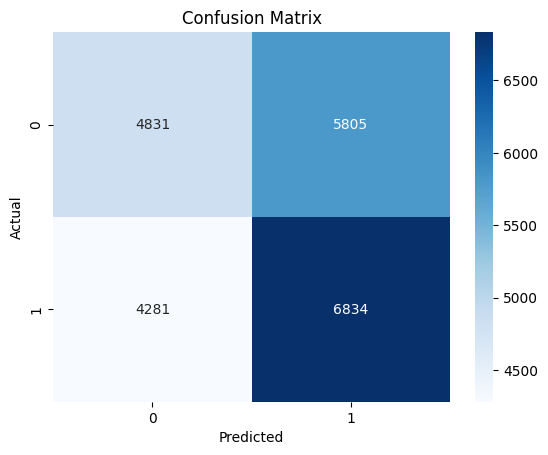

In [ ]:
#Goal: Assess the impact of sentiment on stocks.
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

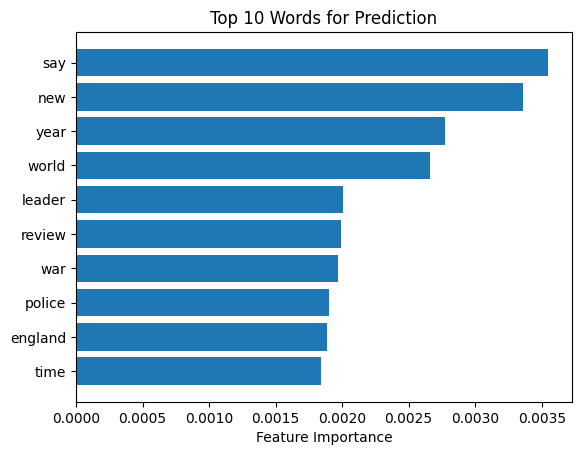

In [ ]:
feature_importances = clf.feature_importances_
features = vectorizer.get_feature_names_out()

sorted_idx = np.argsort(feature_importances)[-10:]
plt.barh(range(10), feature_importances[sorted_idx], align='center')
plt.yticks(range(10), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Words for Prediction")
plt.show()

In [ ]:
#Goal: Testing some questions
!pip install transformers

from transformers import pipeline

# Load sentiment-analysis pipeline
classifier = pipeline('sentiment-analysis')

# Sample financial-related sentences
sentences = [
    "Stock prices are going up rapidly!",
    "The market is experiencing a major crash.",
    "Apple reported record profits this quarter.",
    "Investors are feeling uncertain due to political instability.",
    "Tesla stocks rose by 20% today!"
]

# Get predictions and confidence scores
results = classifier(sentences)

# Display predictions
for sentence, result in zip(sentences, results):
    label = result['label']
    score = round(result['score'] * 100, 2)
    print(f"Sentence: '{sentence}'")
    print(f"Prediction: {label}, Confidence Score: {score}%\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


Sentence: 'Stock prices are going up rapidly!'
Prediction: POSITIVE, Confidence Score: 96.4%

Sentence: 'The market is experiencing a major crash.'
Prediction: NEGATIVE, Confidence Score: 99.95%

Sentence: 'Apple reported record profits this quarter.'
Prediction: POSITIVE, Confidence Score: 99.82%

Sentence: 'Investors are feeling uncertain due to political instability.'
Prediction: NEGATIVE, Confidence Score: 99.67%

Sentence: 'Tesla stocks rose by 20% today!'
Prediction: POSITIVE, Confidence Score: 99.22%



In [ ]:
#Goal: Load the trained model for further use
import os
import joblib

# 1. Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# 2. Define the path to save the model inside the 'models' directory
model_path = os.path.join('models', 'sentiment_stock_model.pkl')

# 3. Save the model to the specified path
joblib.dump(classifier, model_path)
print(f"Model saved to: {model_path}")

Model saved to: models/sentiment_stock_model.pkl
